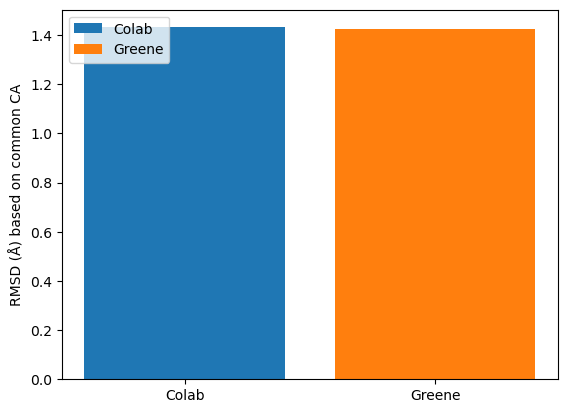

In [13]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def load_pdb(filepath):
    return md.load(filepath)

def get_common_alpha_carbons(traj1, traj2):
    # Get the alpha carbon indices for both trajectories
    traj1_alpha_carbons = traj1.topology.select('name CA')
    traj2_alpha_carbons = traj2.topology.select('name CA')
    
    # Intersect the indices to get only the common ones
    common_indices = np.intersect1d(traj1_alpha_carbons, traj2_alpha_carbons)
    return common_indices

# Load the structures
crystal = load_pdb('../Inputs/3ry2.pdb')
colab = load_pdb('../Inputs/Alphafold/test_76ce1_unrelaxed_rank_002_alphafold2_ptm_model_5_seed_000.pdb')
greene = load_pdb('../Inputs/Inputs/rcsb_pdb_3RY2/unrelaxed_model_5_pred_0.pdb')

# Get common alpha carbon indices
common_alpha_carbons = get_common_alpha_carbons(crystal, colab)
# Make sure to also check with the 'greene' structure if necessary

# Align the Colab and Greene structures to the crystal structure using common alpha carbons
colab_aligned = colab.superpose(crystal, atom_indices=common_alpha_carbons)
greene_aligned = greene.superpose(crystal, atom_indices=common_alpha_carbons)

# Calculate RMSD for common alpha carbons
rmsd_colab_alpha_carbons = md.rmsd(colab_aligned, crystal, atom_indices=common_alpha_carbons)
rmsd_greene_alpha_carbons = md.rmsd(greene_aligned, crystal, atom_indices=common_alpha_carbons)

# Plot the RMSDs for common alpha carbons
plt.bar(x=1, height=np.mean(rmsd_colab_alpha_carbons))
plt.bar(x=2, height=np.mean(rmsd_greene_alpha_carbons))
plt.xticks([1, 2], ['Colab', 'Greene'])
plt.ylabel('RMSD (Å) based on common CA')
plt.legend(['Colab', 'Greene'], loc='upper left')
plt.savefig('../Figures/rmsd_common_alpha-carbons.png')
plt.show()


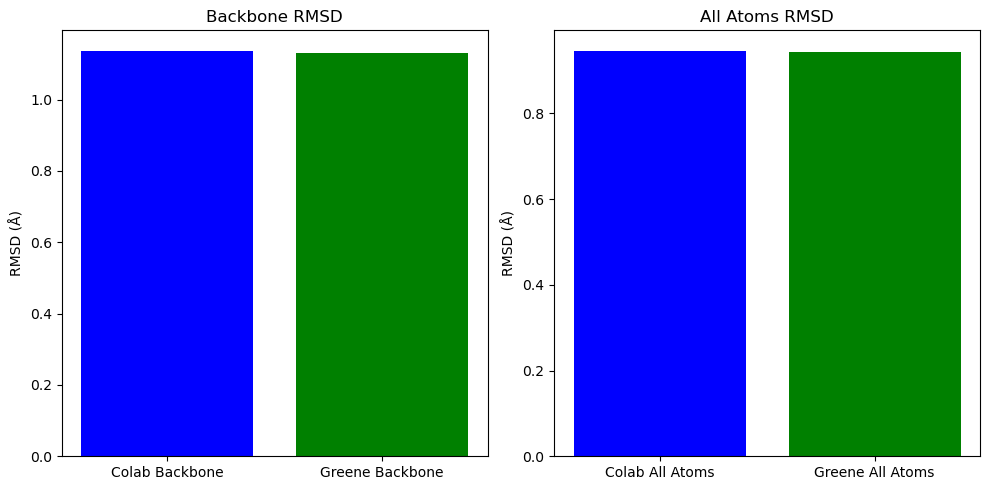

In [14]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def load_pdb(filepath):
    return md.load(filepath)

def get_common_atoms(traj1, traj2, selection='backbone'):
    # Select atoms based on the given selection string
    traj1_atoms = traj1.topology.select(selection)
    traj2_atoms = traj2.topology.select(selection)
    
    # Intersect the indices to get only the common ones
    common_indices = np.intersect1d(traj1_atoms, traj2_atoms)
    return common_indices

# Load the structures
crystal = load_pdb('../Inputs/3ry2.pdb')
colab = load_pdb('../Inputs/Alphafold/test_76ce1_unrelaxed_rank_002_alphafold2_ptm_model_5_seed_000.pdb')
greene = load_pdb('../Inputs/Inputs/rcsb_pdb_3RY2/unrelaxed_model_5_pred_0.pdb')

# Get common backbone atoms
common_backbone_atoms = get_common_atoms(crystal, colab, selection='backbone')

# Get common all atoms (including sidechain)
common_all_atoms = get_common_atoms(crystal, colab, selection='all')

# Align the Colab and Greene structures to the crystal structure using common atoms
colab_aligned_backbone = colab.superpose(crystal, atom_indices=common_backbone_atoms)
greene_aligned_backbone = greene.superpose(crystal, atom_indices=common_backbone_atoms)

# Calculate RMSD for common backbone atoms
rmsd_colab_backbone = md.rmsd(colab_aligned_backbone, crystal, atom_indices=common_backbone_atoms)
rmsd_greene_backbone = md.rmsd(greene_aligned_backbone, crystal, atom_indices=common_backbone_atoms)

# Align the Colab and Greene structures to the crystal structure using all common atoms
colab_aligned_all = colab.superpose(crystal, atom_indices=common_all_atoms)
greene_aligned_all = greene.superpose(crystal, atom_indices=common_all_atoms)

# Calculate RMSD for all common atoms
rmsd_colab_all = md.rmsd(colab_aligned_all, crystal, atom_indices=common_all_atoms)
rmsd_greene_all = md.rmsd(greene_aligned_all, crystal, atom_indices=common_all_atoms)

# Plotting
plt.figure(figsize=(10, 5))

# Backbone RMSD
plt.subplot(1, 2, 1)
plt.bar(x=1, height=np.mean(rmsd_colab_backbone), color='blue')
plt.bar(x=2, height=np.mean(rmsd_greene_backbone), color='green')
plt.xticks([1, 2], ['Colab Backbone', 'Greene Backbone'])
plt.ylabel('RMSD (Å)')
plt.title('Backbone RMSD')

# All atoms RMSD
plt.subplot(1, 2, 2)
plt.bar(x=1, height=np.mean(rmsd_colab_all), color='blue')
plt.bar(x=2, height=np.mean(rmsd_greene_all), color='green')
plt.xticks([1, 2], ['Colab All Atoms', 'Greene All Atoms'])
plt.ylabel('RMSD (Å)')
plt.title('All Atoms RMSD')

plt.tight_layout()
plt.savefig('../Figures/rmsd_backbone_sidechains.png')
plt.show()


In [6]:

import pymol
from pymol import cmd, stored

# Initialize PyMOL
pymol.finish_launching()

# Load your structure
structure_path = ['../Inputs/Inputs/rcsb_pdb_3RY2/unrelaxed_model_5_pred_0.pdb', '../Inputs/Inputs/rcsb_pdb_3RY2/unrelaxed_model_4_pred_0.pdb','../Inputs/Inputs/rcsb_pdb_3RY2/unrelaxed_model_3_pred_0.pdb', '../Inputs/Inputs/rcsb_pdb_3RY2/unrelaxed_model_2_pred_0.pdb', '../Inputs/Inputs/rcsb_pdb_3RY2/unrelaxed_model_1_pred_0.pdb'] 
cmd.load(structure_path, 'protein')

# Color the protein based on B-factor (pLDDT scores)
cmd.spectrum('b', 'blue_white_red', 'protein', minimum=0, maximum=100)

# Show as cartoon
cmd.show('cartoon', 'protein')

# Remove waters for clarity
cmd.remove('solvent')

# Zoom on the protein
cmd.zoom('protein')

# Save the image
image_path = '../Figures/plddt.png'  # Change to your desired save path
cmd.png(image_path, width=1200, height=900, dpi=300, ray=True)

# Quit PyMOL
cmd.quit()


ModuleNotFoundError: No module named 'pymol'